### Evaluating Classification Models

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [71]:
bank = pd.read_csv('data/bank_marketing.csv', index_col = 0)

In [72]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [73]:
model_preds = [1, 0, 0, 1, 1] #prediction from the model
y_true = [1, 1, 0, 1, 0] #the real values of y

In [74]:
3/5 #accuracy

0.6

In [75]:
bank['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [76]:
bank_cleaned = pd.get_dummies(bank, columns=['loan', 'default']).select_dtypes(['int', 'float'])

In [77]:
X = bank_cleaned.drop('y', axis = 1)
y = bank_cleaned['y']

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 22)

In [80]:
from sklearn.linear_model import LogisticRegression

In [81]:
lgr = LogisticRegression(max_iter = 1000)
lgr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [82]:
lgr.score(X_train, y_train)

0.9093263410054708

In [83]:
lgr.score(X_test, y_test)

0.9097795474410022

*Accuracy*:

Percent correct. 

In [84]:
np.unique(y, return_counts=True)

(array([0, 1]), array([36548,  4640]))

In [85]:
4640/(4640 + 36548)

0.11265417111780131

In [86]:
36548/(4640 + 36548) #baseline -- percent of majority class

0.8873458288821987

In [87]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [88]:
tn, fp, fn, tp = confusion_matrix(y_train, lgr.predict(X_train)).ravel()

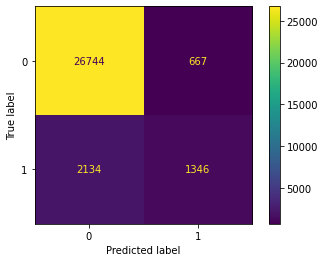

In [89]:
plot_confusion_matrix(lgr, X_train, y_train)

In [90]:
tp/(tp + fn) #sensitivity

0.3867816091954023

In [91]:
tn/(tn + fp) #specificity

0.9756667031483711

In [92]:
tp/(tp + fp) #precision

0.6686537506209638

In [93]:
from sklearn.metrics import recall_score, precision_score

In [94]:
y_pred = lgr.predict(X_train)

In [95]:
recall_score(y_train, y_pred)

0.3867816091954023

In [96]:
precision_score(y_train, y_pred)

0.6686537506209638

### Adjust Our Predictions

In [97]:
lgr.predict_proba(X_test)

array([[0.96406549, 0.03593451],
       [0.91752116, 0.08247884],
       [0.69257079, 0.30742921],
       ...,
       [0.9861059 , 0.0138941 ],
       [0.99351282, 0.00648718],
       [0.98821048, 0.01178952]])

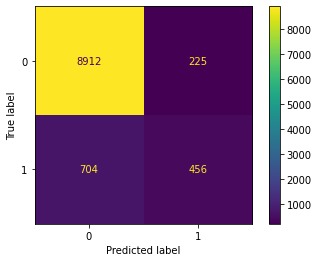

In [98]:
plot_confusion_matrix(lgr, X_test, y_test)

In [99]:
positive_probs = lgr.predict_proba(X_test)[:, 1]

In [104]:
adjusted_predicitions = np.where(positive_probs > 0.7, 1, 0)

In [105]:
import seaborn as sns

<AxesSubplot:>

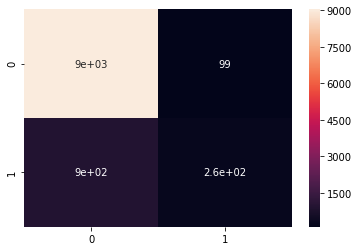

In [106]:
sns.heatmap(confusion_matrix(y_test, adjusted_predicitions), annot = True)

### Grid Search and Model Selection

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [51]:
lgr = LogisticRegression(C = 10_000)

In [53]:
from sklearn.pipeline import make_pipeline

In [64]:
pipe = make_pipeline(StandardScaler(), PolynomialFeatures(), LogisticRegression(max_iter = 1000))

In [65]:
params = {'polynomialfeatures__degree': [1, 2, 3]}

In [66]:
grid = GridSearchCV(pipe, param_grid=params, scoring = 'precision')

In [107]:
#grid.fit(X_train, y_train)

In [68]:
grid.score(X_train, y_train)

0.6669975186104219

In [58]:
from sklearn.model_selection import cross_val_score

In [108]:
#cross_val_score(lgr, X, y, cv = 10, scoring='precision')

### SQL

In [109]:
import sqlite3

In [111]:
conn = sqlite3.connect('bankers.db')

In [112]:
bank.to_sql('deposits', conn)

In [114]:
pd.read_sql('SELECT * FROM deposits', conn)

,index,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,53,technician,married,unknown,no,no,no,cellular,nov,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,28,management,single,university.degree,no,yes,no,cellular,jun,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,39,services,married,high.school,no,no,no,cellular,apr,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,55,retired,married,basic.4y,no,yes,no,cellular,aug,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,41186,48,technician,married,professional.course,no,no,yes,telephone,oct,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
